In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
data=load_iris()

In [2]:
data.data.shape

(150, 4)

In [3]:
print("classes to predict",data.target_names)
print("features",data.feature_names)

classes to predict ['setosa' 'versicolor' 'virginica']
features ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
x=data.data
y=data.target

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

In [6]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [7]:
y_pred=classifier.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score
print("accuracy on  train data",accuracy_score(y_train,classifier.predict(x_train)))

accuracy on  train data 1.0


In [9]:
print("accuracy on  test data",accuracy_score(y_test,y_pred))

accuracy on  test data 0.9473684210526315


In [10]:
classifier_entropy=DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(x_train,y_train)
y_pred_entropy=classifier_entropy.predict(x_test)
print("accuracy on train data",accuracy_score(y_train,classifier_entropy.predict(x_train)))
print("accuracy on test data",accuracy_score(y_test,y_pred_entropy))

accuracy on train data 1.0
accuracy on test data 0.9473684210526315


In [11]:
classiifier_entropy_min_sample=DecisionTreeClassifier(criterion="entropy",min_samples_split=50)
classiifier_entropy_min_sample.fit(x_train,y_train)
y_pred_entropy_minsample=classiifier_entropy_min_sample.predict(x_test)
print("accuracy on train data",accuracy_score(y_train,classiifier_entropy_min_sample.predict(x_train)))
print("accuracy on test data",accuracy_score(y_test,y_pred_entropy_minsample))

accuracy on train data 0.9642857142857143
accuracy on test data 0.9473684210526315


In [12]:
from IPython.core.display import Image
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [14]:
dot_data=StringIO()
export_graphviz(classifier,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=data.feature_names,class_names=data.target_names)

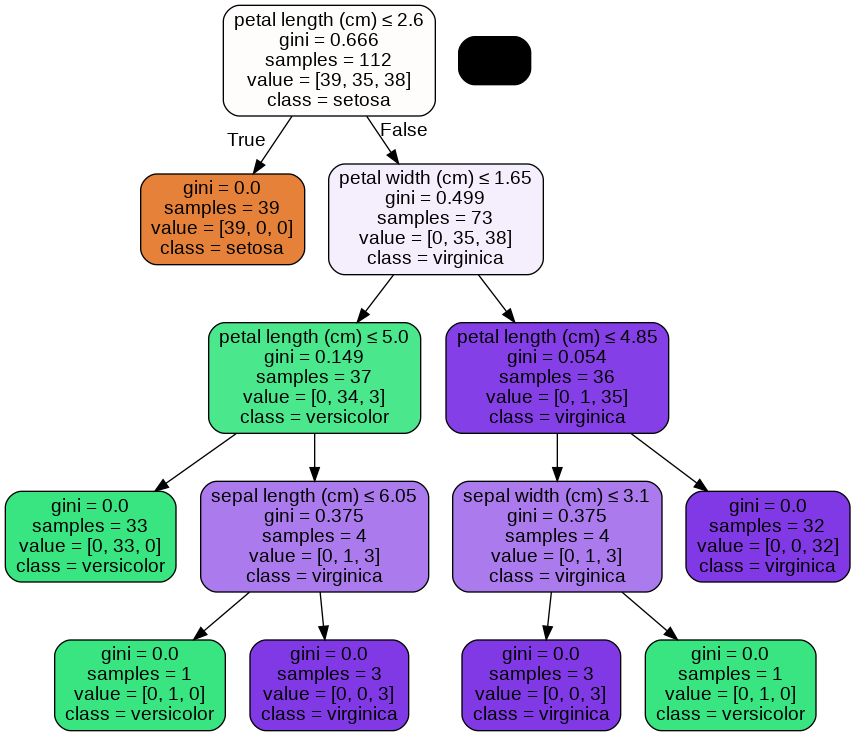

In [15]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())